In [1]:
import pandas as pd

# reading cleaned data
data = pd.read_csv('./classification_data_cleaned.csv')

In [ ]:
x = data.drop(columns=["Mortality_Status"])
y = data["Mortality_Status"]

In [3]:
from sklearn.model_selection import train_test_split

# split 80% for trainning , 20% for testing
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:

print(x_train.dtypes)


Month_of_Birth                    int64
Age                             float64
6th_Stage                        object
Differentiated                   object
Grade                             int64
A_Stage                          object
Tumor_Size                      float64
Regional_Node_Examined          float64
Reginol_Node_Positive             int64
Sex_Female                         bool
T_Stage_T2                         bool
T_Stage_T3                         bool
T_Stage_T4                         bool
N_Stage_N2                         bool
N_Stage_N3                         bool
Estrogen_Status_Positive           bool
Progesterone_Status_Positive       bool
Occupation_Agriculture             bool
Occupation_Arts                    bool
Occupation_Business                bool
Occupation_Cleaning                bool
Occupation_Construction            bool
Occupation_Consultancy             bool
Occupation_Design                  bool
Occupation_Development             bool


In [6]:
x_train = pd.get_dummies(x_train, columns=['6th_Stage', 'Differentiated', 'A_Stage'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['6th_Stage', 'Differentiated', 'A_Stage'], drop_first=True)

# Ensure train and test have same columns
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)


In [ ]:
# verifying the coloumns are numeric
print(x_train.select_dtypes(include=['object', 'string']).columns)  # should return empty Index


Index([], dtype='object')


In [9]:
# dropping missing coloumns
X_train = x_train.dropna()
y_train = y_train[x_train.index]  # Keep alignment

X_test = x_test.dropna()
y_test = y_test[x_test.index]


In [10]:
from sklearn.impute import SimpleImputer

# Fill missing values with the median (better for skewed distributions)
imputer = SimpleImputer(strategy='median')

x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)


In [13]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(x_train, y_train)


LogisticRegression(max_iter=5000)

In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)


KNeighborsClassifier()

In [15]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)


GaussianNB()

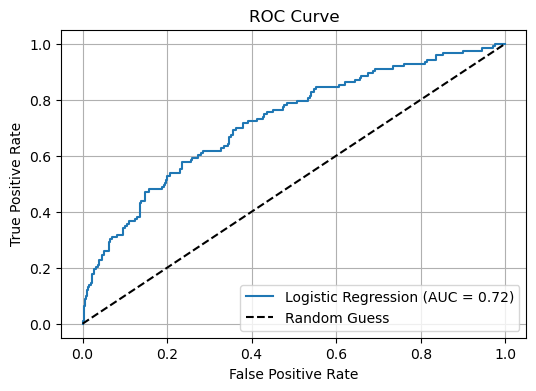

In [18]:
# Evaluate all models - Logistic Regression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities for positive class
y_probs = lr_model.predict_proba(x_test)[:, 1] 

# Calculate ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(false_positive_rate, true_positive_rate, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

